In [ ]:
# import data set 
# Change the values below to change your data selection.

FILE=1                # There are 48 files.
CHANNEL=0             # There are 2 channels
SAMPLE_START=114000   # Start of the sample in the file.
SAMPLE_SIZE=4000      # Number of readings (360 per second).

In [ ]:
!pip install tqdm
!pip install wfdb
!pip install datasets

In [ ]:
import wfdb as wf
import numpy as np
from datasets import mitdb as dm
from matplotlib import pyplot as plt

Load File: 

In [ ]:
# Get available data files.
dbfiles = dm.get_records()
print('Total files: ', len(dbfiles))

# Pick a file.
datfile = dbfiles[100]
print('Loading file:', datfile)

# Read the file.
record = wf.rdsamp(datfile)
annotation = wf.rdann(datfile, 'atr')

# Info about the data.
print('Sampling frequency:', record[1].get('fs'))
print('Data shape:', record[0].shape)
print('Annotations:', len(annotation.num))

Plot:

In [ ]:
record = wf.rdsamp(datfile)
annotation = wf.rdann(datfile, 'atr')

# Get data and annotations for the samples selected below.
sample_end = SAMPLE_START + SAMPLE_SIZE
channel = record[0][SAMPLE_START:sample_end, CHANNEL]

# Plot the heart beats. Time scale is number of readings
# divided by sampling frequency.
times = (np.arange(SAMPLE_SIZE, dtype = 'float') + SAMPLE_START) / record[1].get('fs')
plt.figure(figsize=(20,10))
plt.plot(times, channel)

# Extract annotations.
where = np.logical_and(annotation.sample >= SAMPLE_START, annotation.sample < sample_end)
annots = annotation.sample[where] - SAMPLE_START
annotypes = np.array(annotation.symbol)
annotypes = annotypes[where]

# Plot the Annotations.
annotimes = times[annots]
plt.plot(annotimes, np.ones_like(annotimes) * channel.max() * 1.4, 'ro')

# Annotation codes.
for idx, annot in enumerate(annots):
    plt.annotate(annotypes[idx], xy = (times[annot], channel.max() * 1.1))

plt.xlim([SAMPLE_START / record[1].get('fs'), (sample_end / record[1].get('fs')) + 1])
plt.xlabel('Offset')
plt.ylabel(record[1].get('sig_name')[CHANNEL])
plt.show()

In [1]:
import wfdb
record = wfdb.rdsamp('mitdb/100', sampto=3000)
#annotation = wfdb.rdann('sampledata/100', 'atr', sampto=3000)

Plot data:

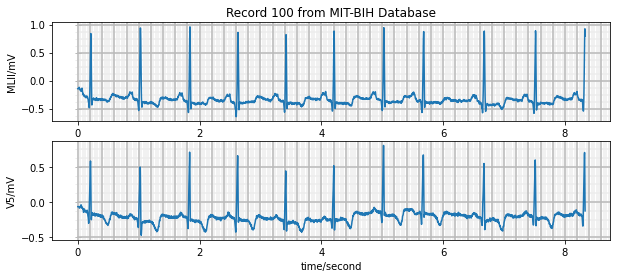

In [2]:
wfdb.plotrec(record,
            title = 'Record 100 from MIT-BIH Database',
            timeunits = 'seconds', figsize = (10,4), ecggrids = 'all')